In [43]:
import pandas as pd
from nltk import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

tweets = pd.read_csv('BrandTweets.csv')

Populating the interactive namespace from numpy and matplotlib


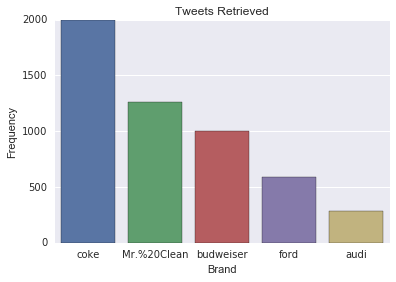

In [33]:
ax = sns.barplot(x=tweets['Brand'].value_counts().index,y=tweets['Brand'].value_counts())
ax.set(xlabel='Brand', ylabel='Frequency')
sns.plt.title('Tweets Retrieved')
plt.show()

First, consider the Coca-Cola commercial, "It's Beautiful," which originally aired during the 2014 Super Bowl, and again during the 2016 Rio Olympics. The ad features the song "America The Beautiful" being sung in many languages, celebrating diversity and multi-culturalism. We will investigate the main topics of tweets related to the Coca-Cola ad and see if they are similar to the topics intended by the ad.

In [39]:
# Investigate some tweets about Coca-Cola
coke = tweets[tweets['Brand'] == 'coke']
coke['text'].head(20)

288    Super Bowl 51: Coke airs 'America Is Beautiful...
289    People on the right who like to call others sn...
290    @StylesMovieNews @radioharold And the diet cok...
291    RT @EW: The Coca-Cola commercial received so m...
292    RT @Kim_is__bored: I hope that Coca-Cola pisse...
293    RT @EW: The Coca-Cola commercial received so m...
294    RT @EW: The Coca-Cola commercial received so m...
295    I am bored, so I am finding people pissed off ...
296    RT @AlexCanRelate: does anyone remember when t...
297    RT @EW: The Coca-Cola commercial received so m...
298    RT @DrMartyFox: Coke #SuperBowl Ad Celebrating...
299    RT @CatalinaCruz: Touchdowns!! Have a coke &am...
300    @tour_de_francis @CocaCola Why can you use a F...
301    RT @CatalinaCruz: Touchdowns!! Have a coke &am...
302    RT @CatalinaCruz: Touchdowns!! Have a coke &am...
303    RT @CatalinaCruz: Touchdowns!! Have a coke &am...
304    @CadeIsCancer Coke's new superbowl commercial ...
305    RT @wdwise: "I'm never d

In [42]:
# Remove duplicate tweets due to RT's. We are not looking for influencers, so only need 1 tweet to discover sentiment/content
coke = coke.drop_duplicates(subset = 'text')
len(coke)

458

In [47]:
def get_freq(tweet):
    '''Takes a tweet and returns a dictionary of tokens and frequencies within tweet.'''
    freq = {}
    tokens = tweet.word_tokenize(tweet)
    
    for t in tokens:
        try:
            freq[t] = freq[t]+1
        except:
            freq[t] = 1            
    return freq

In [54]:
def agg_counts(tweets):
    '''Takes list of tweets (text) and aggregates frequencies of all tokens, returned as a dictionary.'''
    # Define frequency dictionary
    all_freq = {}
    
    # Loop through all tweets
    for i in range(0,len(tweets)): 
        tweet = tweets[i]
        tweet = tweet.decode("utf8")

        tweet_freq = get_freq(tweet) # Get the token frequencies of one tweet

        for key in set(tweet_freq)&set(all_freq):
            all_freq[key] += tweet_freq[key]
        for key in set(tweet_freq).difference(set(all_freq)):
            all_freq[key] = tweet_freq[key]
    
    return all_freq

In [59]:
coke_freq_dict = agg_counts(coke['text'].tolist())

AttributeError: 'unicode' object has no attribute 'word_tokenize'

In [66]:
test = coke['text'].tolist()[0]
test1 = test.decode("utf8")
test1.dtype

AttributeError: 'unicode' object has no attribute 'dtype'